# [How to train Detectron2 with Custom COCO Datasets](https://www.dlology.com/blog/how-to-train-detectron2-with-custom-coco-datasets/) | DLology

<img src="https://dl.fbaipublicfiles.com/detectron2/Detectron2-Logo-Horz.png" width="500">

This notebook will help you get started with this framwork by training a instance segmentation model with your custom COCO datasets.

# Install detectron2

In [1]:
!pip install -U torch torchvision
!pip install git+https://github.com/facebookresearch/fvcore.git
import torch, torchvision
torch.__version__

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.1/779.1 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 95.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.2/176.

'2.3.0+cu121'

In [1]:
!git clone https://github.com/facebookresearch/detectron2 detectron2_repo
!pip install -e detectron2_repo

fatal: destination path 'detectron2_repo' already exists and is not an empty directory.
Obtaining file:///content/detectron2_repo
  Preparing metadata (setup.py) ... done
  Attempting uninstall: detectron2
    Found existing installation: detectron2 0.6
    Uninstalling detectron2-0.6:
      Successfully uninstalled detectron2-0.6
  Running setup.py develop for detectron2


In [2]:
# You may need to restart your runtime prior to this, to let your installation take effect
# Some basic setup
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import matplotlib.pyplot as plt
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

# Train on Cars Defect Dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
cd /content/drive/MyDrive/Defectron2/Car_Defect_Defectron/train/_annotations.coco.json

[Errno 20] Not a directory: '/content/drive/MyDrive/Defectron2/Car_Defect_Defectron/train/_annotations.coco.json'
/content


In [5]:
import os

directory = "/content/drive/MyDrive/Defectron2/Car_Defect_Defectron/train/"
target_file = "_annotations.coco.json"

# List all files in the directory
files = os.listdir(directory)

# Filter the list to find the target file
target_files = [file for file in files if file == target_file]

# Check if the target file exists
if target_files:
    print(f"Found '{target_file}' file in the directory.")  # Corrected the print statement
    # If you want to get the full path of the file, you can use os.path.join()
    full_path = os.path.join(directory, target_files[0])
    print("Full path:", full_path)
else:
    print("File not found in the directory.")


Found '_annotations.coco.json' file in the directory.
Full path: /content/drive/MyDrive/Defectron2/Car_Defect_Defectron/train/_annotations.coco.json


In [6]:
from detectron2.data.datasets import register_coco_instances
register_coco_instances("Car_defect", {}, "/content/drive/MyDrive/Defectron2/Car_Defect_Defectron/train/_annotations.coco.json", "/content/drive/MyDrive/Defectron2/Car_Defect_Defectron/train/")

In [7]:
Car_defect_metadata = MetadataCatalog.get("Car_defect")
dataset_dicts = DatasetCatalog.get("Car_defect")

WARNING [05/06 15:07:57 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[05/06 15:07:57 d2.data.datasets.coco]: Loaded 2626 images in COCO format from /content/drive/MyDrive/Defectron2/Car_Defect_Defectron/train/_annotations.coco.json


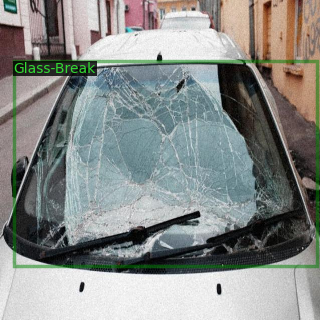

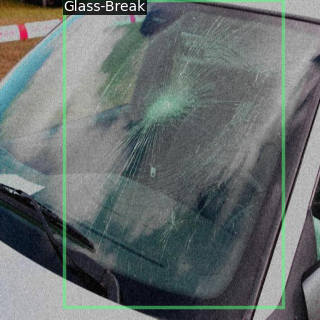

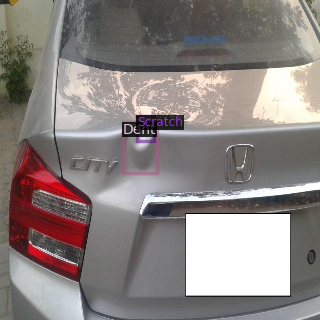

In [8]:
import random
for d in random.sample(dataset_dicts, 3):
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=Car_defect_metadata, scale=0.5)
    vis = visualizer.draw_dataset_dict(d)
    cv2_imshow(vis.get_image()[:, :, ::-1])

In [12]:
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
from detectron2 import model_zoo

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/retinanet_R_101_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("Car_defect",)
cfg.DATASETS.TEST = ()
cfg.DATALOADER.NUM_WORKERS = 0
cfg.MODEL.WEIGHTS = "detectron2://ImageNetPretrained/MSRA/R-101.pkl"  # Let training initialize from model zoo
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.00025  # pick a good LR
cfg.SOLVER.MAX_ITER = 3000    # 300 iterations seems good enough for this toy dataset; you may need to train longer for a practical dataset
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 256   # faster, and good enough for this toy dataset (default: 512)
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 4

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()

[05/06 15:39:31 d2.engine.defaults]: Model:
RetinaNet(
  (backbone): FPN(
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelP6P7(
      (p6): Conv2d(2048, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (p7): Conv2d(256, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    )
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res2)

R-101.pkl: 179MB [00:01, 116MB/s]                           


[05/06 15:39:33 d2.checkpoint.c2_model_loading]: Renaming Caffe2 weights ......
[05/06 15:39:34 d2.checkpoint.c2_model_loading]: Following weights matched with submodule backbone.bottom_up - Total num: 105


backbone.fpn_lateral3.{bias, weight}
backbone.fpn_lateral4.{bias, weight}
backbone.fpn_lateral5.{bias, weight}
backbone.fpn_output3.{bias, weight}
backbone.fpn_output4.{bias, weight}
backbone.fpn_output5.{bias, weight}
backbone.top_block.p6.{bias, weight}
backbone.top_block.p7.{bias, weight}
head.bbox_pred.{bias, weight}
head.bbox_subnet.0.{bias, weight}
head.bbox_subnet.2.{bias, weight}
head.bbox_subnet.4.{bias, weight}
head.bbox_subnet.6.{bias, weight}
head.cls_score.{bias, weight}
head.cls_subnet.0.{bias, weight}
head.cls_subnet.2.{bias, weight}
head.cls_subnet.4.{bias, weight}
head.cls_subnet.6.{bias, weight}
  fc1000.{bias, weight}


[05/06 15:39:34 d2.engine.train_loop]: Starting training from iteration 0


/usr/local/lib/python3.10/dist-packages/torch/functional.py:512: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3587.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


[05/06 15:40:09 d2.utils.events]:  eta: 1:13:44  iter: 19  total_loss: 1.667  loss_cls: 1.088  loss_box_reg: 0.5685    time: 1.6199  last_time: 1.3016  data_time: 1.0441  last_data_time: 0.9802   lr: 4.9953e-06  max_mem: 3104M
[05/06 15:40:44 d2.utils.events]:  eta: 1:12:35  iter: 39  total_loss: 1.927  loss_cls: 1.257  loss_box_reg: 0.6522    time: 1.5413  last_time: 1.4814  data_time: 1.0046  last_data_time: 0.9565   lr: 9.9902e-06  max_mem: 3104M
[05/06 15:41:14 d2.utils.events]:  eta: 1:12:09  iter: 59  total_loss: 1.702  loss_cls: 1.148  loss_box_reg: 0.5808    time: 1.5157  last_time: 1.5383  data_time: 1.0107  last_data_time: 1.0110   lr: 1.4985e-05  max_mem: 3104M
[05/06 15:41:43 d2.utils.events]:  eta: 1:11:45  iter: 79  total_loss: 1.897  loss_cls: 1.218  loss_box_reg: 0.6727    time: 1.5066  last_time: 1.5812  data_time: 1.0069  last_data_time: 1.1051   lr: 1.998e-05  max_mem: 3104M
[05/06 15:42:14 d2.utils.events]:  eta: 1:11:39  iter: 99  total_loss: 1.766  loss_cls: 1.173

In [13]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5   # set the testing threshold for this model
cfg.DATASETS.TEST = ("Car_defect", )
predictor = DefaultPredictor(cfg)

[05/06 16:27:56 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from ./output/model_final.pth ...


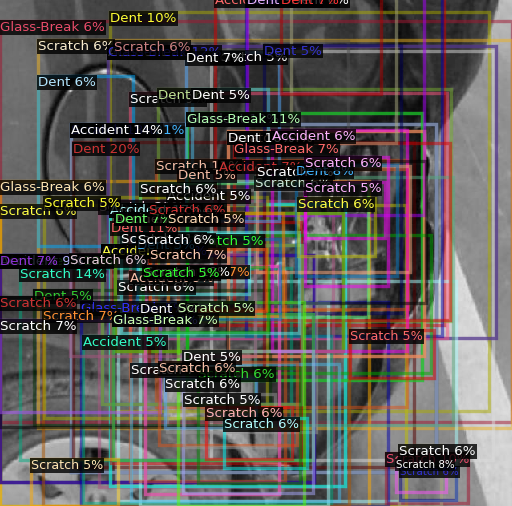

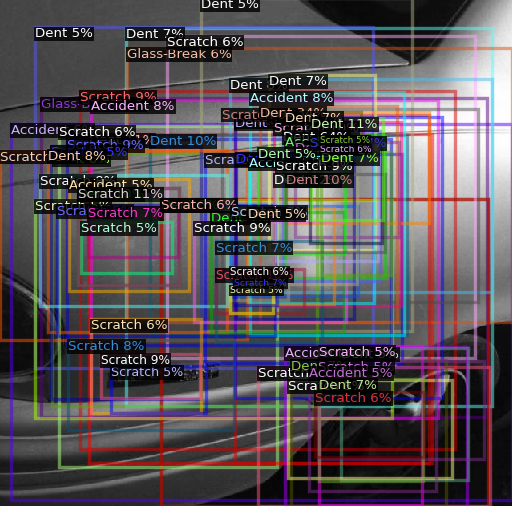

In [15]:
from detectron2.utils.visualizer import ColorMode

for d in random.sample(dataset_dicts, 2):
    im = cv2.imread(d["file_name"])
    outputs = predictor(im)
    v = Visualizer(im[:, :, ::-1],
                   metadata=Car_defect_metadata,
                   scale=0.8,
                   instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels
    )
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    cv2_imshow(v.get_image()[6:, :, ::-1])